In [45]:
import pandas as pd
from sklearn import datasets # !pip install scikit-learn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from pylab import rcParams
rcParams ['figure.figsize'] = 15, 8

Загрузка и первый взгляд на данные

In [2]:
linnerud = datasets.load_linnerud()

In [46]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [50]:
# for line in linnerud.DESCR.split('\n'):
#     print(line)

In [49]:
print(linnerud["DESCR"])

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



- *физиологический* - CSV, содержащий 20 наблюдений по 3 физиологическим переменным:
    Вес, талия и пульс.
- *упражнение* - CSV, содержащий 20 наблюдений по 3 переменным упражнения:
    Подтягивания, приседания и прыжки.

In [52]:
linnerud.feature_names

['Chins', 'Situps', 'Jumps']

Смотрим на данные, выводим 5 первых строк: 

In [53]:
linnerud.data[:5]

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.]])

Смотрим на целевую переменную

In [8]:
linnerud.target_names

['Weight', 'Waist', 'Pulse']

In [9]:
linnerud.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

Собираем все данные в датасет

In [58]:
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
df.sample(5)

,Chins,Situps,Jumps
3,12.0,105.0,37.0
11,13.0,210.0,115.0
1,2.0,110.0,60.0
0,5.0,162.0,60.0
16,4.0,60.0,25.0


In [65]:
# df['target'] = linnerud.target
df[linnerud.target_names] = linnerud.target
# df = df.drop('target', axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [66]:
df.sample(5)

,Chins,Situps,Jumps,Weight,Waist,Pulse
18,15.0,225.0,73.0,156.0,33.0,54.0
1,2.0,110.0,60.0,189.0,37.0,52.0
12,14.0,215.0,105.0,154.0,34.0,64.0
8,15.0,200.0,40.0,176.0,31.0,74.0
17,11.0,230.0,80.0,157.0,32.0,52.0


Расределение целевой переменной датасета

In [13]:
df["Waist"].value_counts()

33.0    4
36.0    3
37.0    3
34.0    3
38.0    2
35.0    2
31.0    1
46.0    1
32.0    1
Name: Waist, dtype: int64

In [71]:
df["Weight"].value_counts(normalize = True).head()

189.0    0.10
193.0    0.10
176.0    0.10
154.0    0.10
191.0    0.05
Name: Weight, dtype: float64

In [97]:
df['Pulse'].nunique()

11

Размерность данных

In [73]:
df.shape

(20, 6)

Информация о датасете

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [18]:
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


Извлечение нескольких столбцов

In [19]:
df[['Chins', 'Situps','Jumps']].sample(3)

,Chins,Situps,Jumps
14,6.0,70.0,31.0
0,5.0,162.0,60.0
5,4.0,101.0,42.0


Фильтрация данных

In [74]:
filtered_chins = df[df['Chins'] > 13]
filtered_chins

,Chins,Situps,Jumps,Weight,Waist,Pulse
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0
10,17.0,120.0,38.0,169.0,34.0,50.0
12,14.0,215.0,105.0,154.0,34.0,64.0
18,15.0,225.0,73.0,156.0,33.0,54.0


In [76]:
filtered_chins_jumps = df[(df['Chins'] > 13) & (df['Jumps'] > 85) & (df['Situps'] > 210)]
filtered_chins_jumps

,Chins,Situps,Jumps,Weight,Waist,Pulse
9,17.0,251.0,250.0,154.0,33.0,56.0
12,14.0,215.0,105.0,154.0,34.0,64.0


In [77]:
filtered_chins_jumps = df[(df['Chins'] < 5) & (df['Jumps'] < 39) & (df['Situps'] < 101)]
filtered_chins_jumps

,Chins,Situps,Jumps,Weight,Waist,Pulse
16,4.0,60.0,25.0,176.0,37.0,54.0


In [78]:
df.loc[10:15,['Jumps', 'Pulse']]

,Jumps,Pulse
10,38.0,50.0
11,115.0,52.0
12,105.0,64.0
13,50.0,50.0
14,31.0,46.0
15,120.0,62.0


In [81]:
df.loc[df['Waist'] == 33, 'Weight'] # вывод только для столбца Chins

9     154.0
11    166.0
18    156.0
19    138.0
Name: Weight, dtype: float64

Сортировка данных

In [88]:
df.sort_values(by = 'Pulse', ascending = False).head(10)

,Chins,Situps,Jumps,Weight,Waist,Pulse
8,15.0,200.0,40.0,176.0,31.0,74.0
19,2.0,110.0,43.0,138.0,33.0,68.0
12,14.0,215.0,105.0,154.0,34.0,64.0
15,12.0,210.0,120.0,202.0,37.0,62.0
3,12.0,105.0,37.0,162.0,35.0,62.0
7,6.0,125.0,40.0,167.0,34.0,60.0
2,12.0,101.0,101.0,193.0,38.0,58.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [90]:
df.sort_values(by = 'Waist', ascending = True).tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
19,2.0,110.0,43.0,138.0,33.0,68.0
7,6.0,125.0,40.0,167.0,34.0,60.0
10,17.0,120.0,38.0,169.0,34.0,50.0
12,14.0,215.0,105.0,154.0,34.0,64.0
4,13.0,155.0,58.0,189.0,35.0,46.0
3,12.0,105.0,37.0,162.0,35.0,62.0
14,6.0,70.0,31.0,193.0,36.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
0,5.0,162.0,60.0,191.0,36.0,50.0
15,12.0,210.0,120.0,202.0,37.0,62.0


In [92]:
df['Chins'].max()

17.0

In [93]:
df['Situps'].min()

50.0

In [94]:
df['Jumps'].mean()

70.3

In [98]:
df['Pulse'].nunique()

11

In [96]:
data = df.groupby('Pulse')['Chins'].agg(count = 'max').reset_index().sort_values(by = 'Pulse')
data

,Pulse,count
0,46.0,13.0
1,50.0,17.0
2,52.0,13.0
3,54.0,15.0
4,56.0,17.0
5,58.0,12.0
6,60.0,6.0
7,62.0,12.0
8,64.0,14.0
9,68.0,2.0


In [30]:
data_min = df.groupby('Pulse')['Chins'].agg(count = 'min').reset_index().sort_values(by = 'Pulse')
data_min

,Pulse,count
0,46.0,6.0
1,50.0,1.0
2,52.0,2.0
3,54.0,4.0
4,56.0,4.0
5,58.0,12.0
6,60.0,6.0
7,62.0,12.0
8,64.0,14.0
9,68.0,2.0


In [99]:
data['Pulse']

0     46.0
1     50.0
2     52.0
3     54.0
4     56.0
5     58.0
6     60.0
7     62.0
8     64.0
9     68.0
10    74.0
Name: Pulse, dtype: float64

Графики

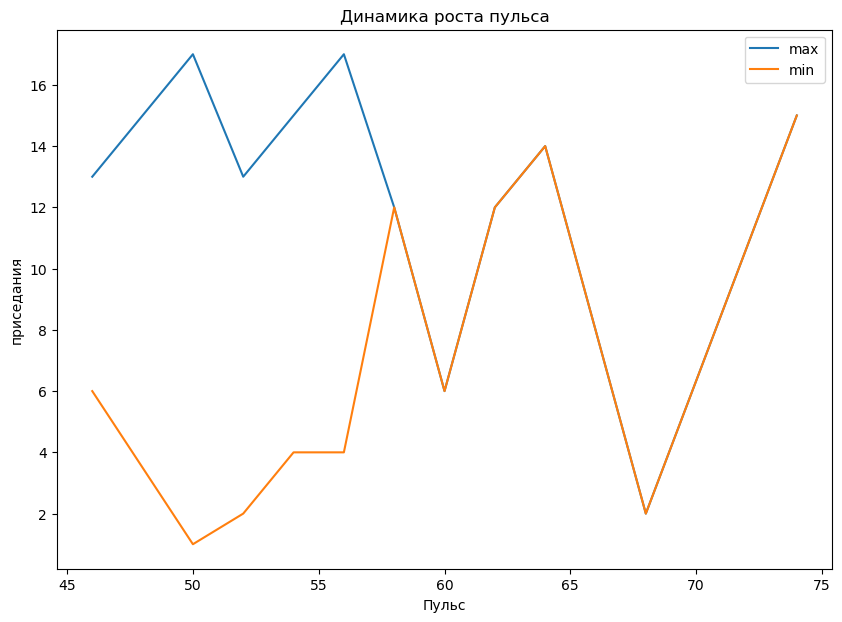

In [31]:
plt.figure(figsize = (10,7))

plt.plot(data['Pulse'], data['count'])
plt.plot(data_min.Pulse, data_min['count'])

plt.title('Динамика роста пульса')
plt.xlabel('Пульс')
plt.ylabel('приседания')
plt.legend(['max','min'])

plt.show()


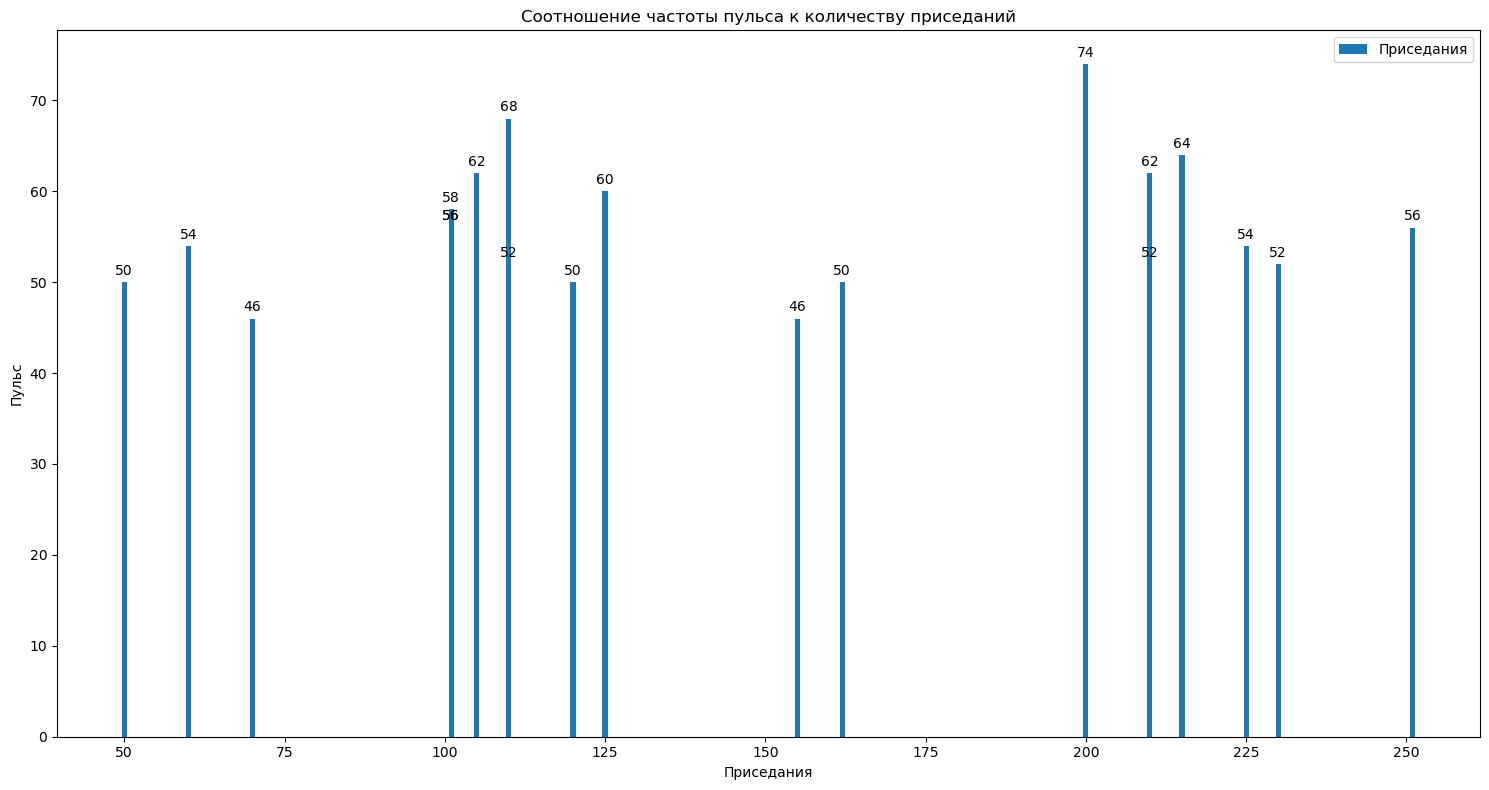

In [100]:
fig, ax = plt.subplots()
rect = ax.bar(
    df.Situps, df.Pulse, label='Приседания'
)

ax.set_ylabel('Пульс')
ax.set_xlabel('Приседания')
ax.set_title('Соотношение частоты пульса к количеству приседаний')
ax.legend()

ax.bar_label(rect, padding=3)

fig.tight_layout()

plt.show()

(array([1., 4., 4., 2., 4., 3., 1., 0., 0., 1.]),
 array([138. , 148.9, 159.8, 170.7, 181.6, 192.5, 203.4, 214.3, 225.2,
        236.1, 247. ]),
 <BarContainer object of 10 artists>)

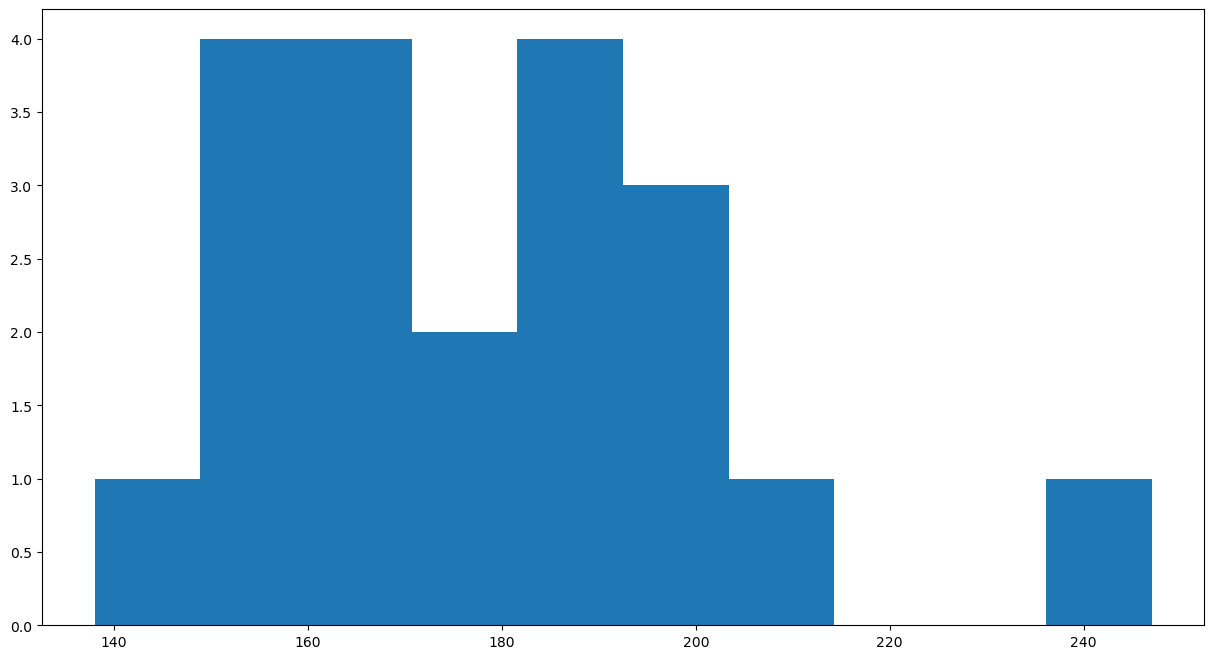

In [101]:
plt.hist(df.Weight)

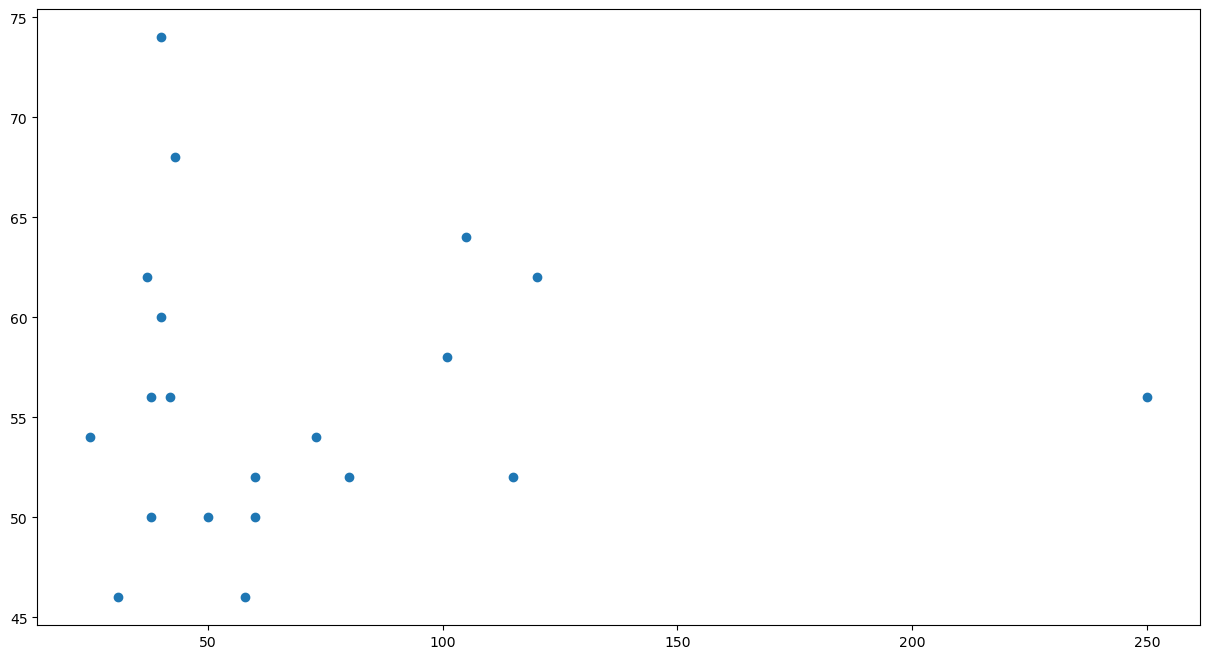

In [34]:
plt.scatter(df.Jumps, df.Pulse)

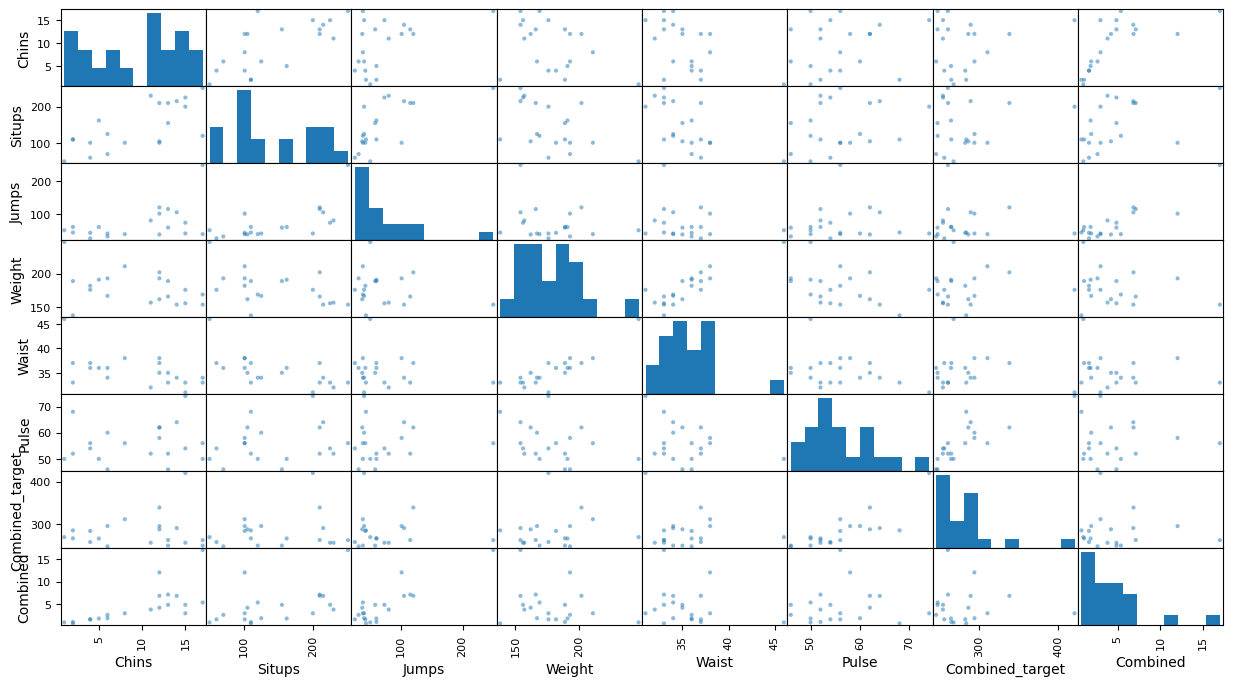

In [108]:
graf = pd.plotting.scatter_matrix(df)

Добавим новый столбец

In [105]:
df['Combined'] = df.Chins * df.Jumps / df.Situps
df

,Chins,Situps,Jumps,Weight,Waist,Pulse,Combined_target,Combined
0,5.0,162.0,60.0,191.0,36.0,50.0,265.277778,1.851852
1,2.0,110.0,60.0,189.0,37.0,52.0,265.621622,1.090909
2,12.0,101.0,101.0,193.0,38.0,58.0,294.578947,12.000000
3,12.0,105.0,37.0,162.0,35.0,62.0,286.971429,4.228571
4,13.0,155.0,58.0,189.0,35.0,46.0,248.400000,4.864516
5,4.0,101.0,42.0,182.0,36.0,56.0,283.111111,1.663366
6,8.0,101.0,38.0,211.0,38.0,56.0,310.947368,3.009901
7,6.0,125.0,40.0,167.0,34.0,60.0,294.705882,1.920000
8,15.0,200.0,40.0,176.0,31.0,74.0,420.129032,3.000000
9,17.0,251.0,250.0,154.0,33.0,56.0,261.333333,16.932271


In [106]:
df['Combined_target'] = df.Pulse /  df.Waist * df.Weight
df

,Chins,Situps,Jumps,Weight,Waist,Pulse,Combined_target,Combined
0,5.0,162.0,60.0,191.0,36.0,50.0,265.277778,1.851852
1,2.0,110.0,60.0,189.0,37.0,52.0,265.621622,1.090909
2,12.0,101.0,101.0,193.0,38.0,58.0,294.578947,12.000000
3,12.0,105.0,37.0,162.0,35.0,62.0,286.971429,4.228571
4,13.0,155.0,58.0,189.0,35.0,46.0,248.400000,4.864516
5,4.0,101.0,42.0,182.0,36.0,56.0,283.111111,1.663366
6,8.0,101.0,38.0,211.0,38.0,56.0,310.947368,3.009901
7,6.0,125.0,40.0,167.0,34.0,60.0,294.705882,1.920000
8,15.0,200.0,40.0,176.0,31.0,74.0,420.129032,3.000000
9,17.0,251.0,250.0,154.0,33.0,56.0,261.333333,16.932271


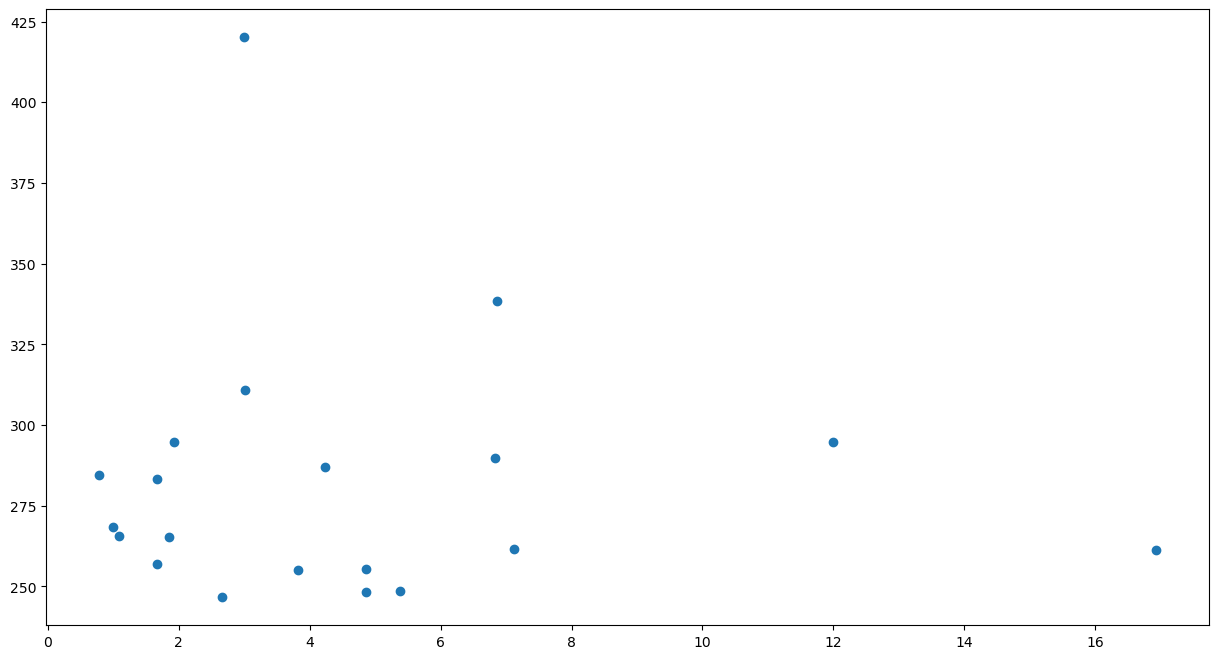

In [38]:
plt.scatter(df.Combined, df.Combined_target)

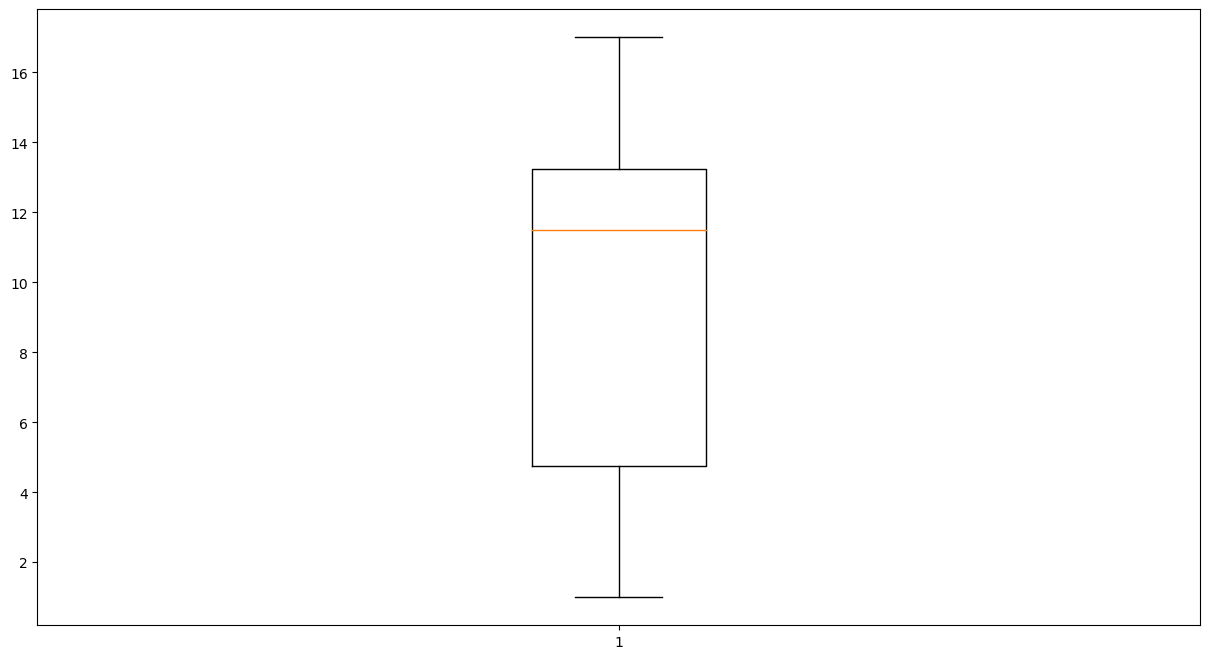

In [39]:
graf = plt.boxplot(df.Chins)

In [103]:
corr

,Chins,Situps,Jumps,Weight,Waist,Pulse
Chins,1.000000,0.695727,0.495760,-0.389694,-0.552232,0.150648
Situps,0.695727,1.000000,0.669206,-0.493084,-0.645598,0.225038
Jumps,0.495760,0.669206,1.000000,-0.226296,-0.191499,0.034933
Weight,-0.389694,-0.493084,-0.226296,1.000000,0.870243,-0.365762
Waist,-0.552232,-0.645598,-0.191499,0.870243,1.000000,-0.352892
Pulse,0.150648,0.225038,0.034933,-0.365762,-0.352892,1.000000


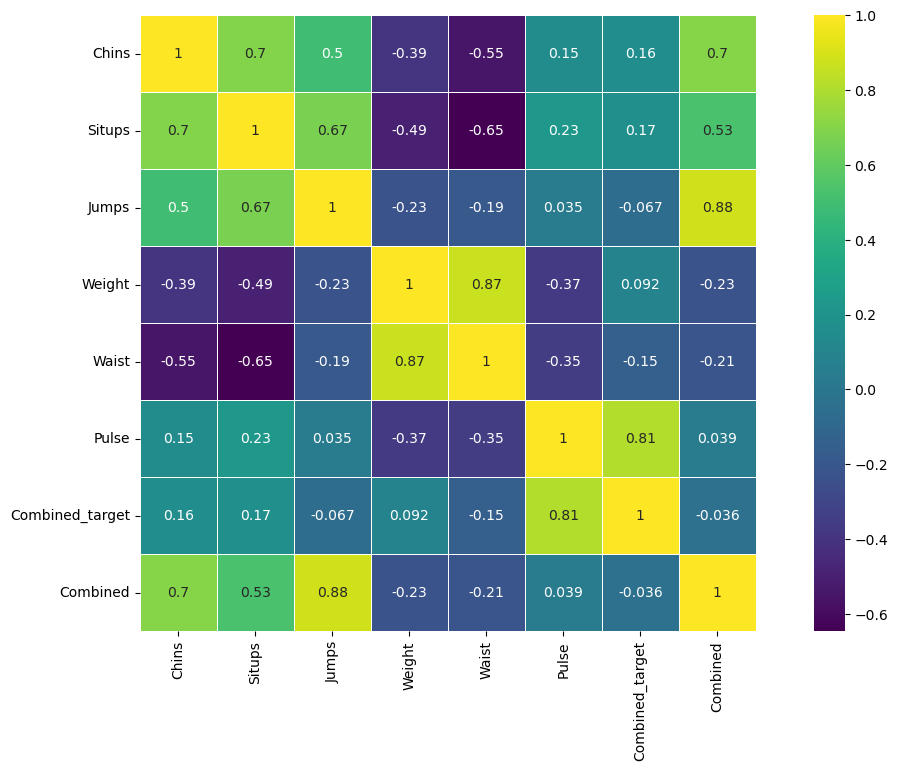

In [107]:
import seaborn as sns
corr = df.corr()

ax = sns.heatmap(corr, square=True, annot=True, linewidths=.5, cmap ='viridis')

Значения коэффициента корреляции интерпретируются следующим образом:

* До 0,2 — очень слабая корреляция
* До 0,5 — слабая
* До 0,7 — средняя
* До 0,9 — высокая
* Больше 0,9 — очень высокая

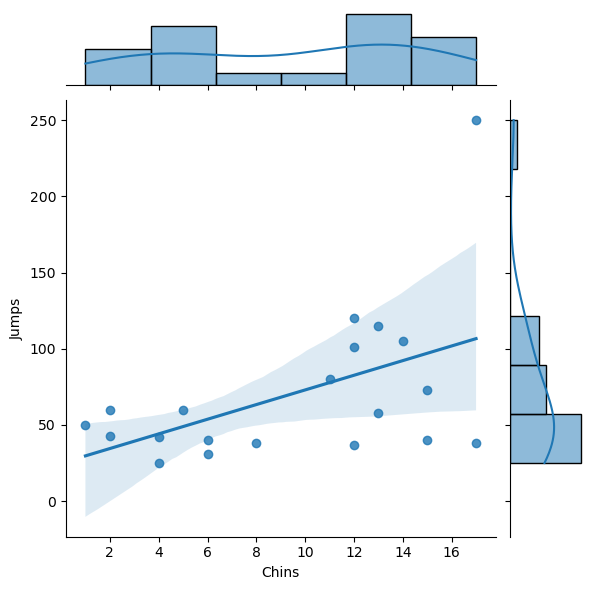

In [41]:
sns.jointplot(x=df['Chins'], y=df['Jumps'], data=df, kind='reg')

Для задачи классификации можно построть круговую диаграмму

In [44]:

# plt.figure(figsize = (10,7))

# plt.pie(data, autopct='%1.1f%%', shadow=True, explode=explode)

# plt.title('Доля...')
# plt.legend(data.index)

# plt.show()